In [ ]:
import keras
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten
from keras.models import Sequential
from keras.models import load_model
from keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
from keras.datasets import boston_housing , reuters , fashion_mnist, mnist, imdb, cifar100 , cifar10

In [ ]:
def show(trainImages):
  plt.figure(figsize=(10,10))
  _, axis = plt.subplots(4,4)
  for i , ax in enumerate(axis.ravel()):
    ax.imshow(trainImages[i], 'gray')
    ax.axis('off')
  plt.show()

In [ ]:
(trainImages, trainLabels), (testImages, testLabels) = imdb.load_data()

17464789/17464789 [==============================] - 1s 0us/step


TypeError: ignored

<Figure size 1000x1000 with 0 Axes>

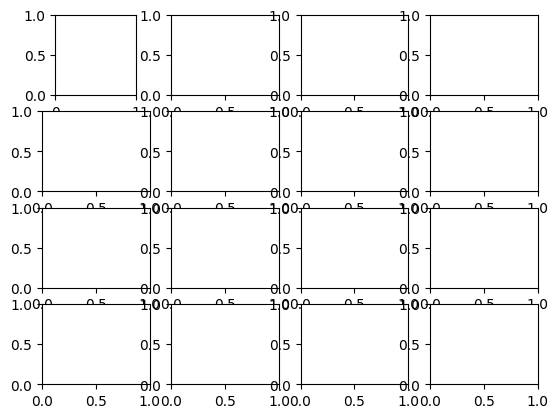

In [ ]:
show(trainImages)

In [ ]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(12, kernel_size=(3,3),  activation='relu' ))
model.add(Conv2D(24, kernel_size=(3,3),  activation='relu' ))
model.add(Conv2D(36, kernel_size=(3,3),  activation='relu' ))
model.add(Conv2D(48, kernel_size=(3,3),  activation='relu' ))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(100, activation= 'relu'))
model.add(Dense(50 , activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 12)        660       
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 24)        2616      
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 36)          7812      
                                                                 
 conv2d_9 (Conv2D)           (None, 6, 6, 48)          15600     
                                                      

In [ ]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer= 'Adam', metrics= ['accuracy'])

In [ ]:
epochs = 50
batchSize = 128

In [ ]:
records = model.fit(trainImages, trainLabels, epochs=epochs, batch_size=batchSize)

Epoch 1/50


ValueError: ignored

In [ ]:
preds = model.predict(testImages)

In [ ]:
model.evaluate(testImages, testLabels)

In [ ]:
model.save("cifar.h5")